# Name: Sushilkumar Patil

# Task 2: Prediction using Supervised ML

Aim:

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Importing all libraries required in this notebook

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

# Loading data

In [2]:
url = "http://bit.ly/w-data"
d = pd.read_csv(url)
print("Data imported successfully")

d.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

# Data Preprocessing

In [9]:
d.shape

(25, 2)

Given data consists of 25 rows and 2 columns

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


All the columns are int or float types. None of them is Object type

#### Plotting the distribution of scores

Text(0,0.5,'Percentage Score')

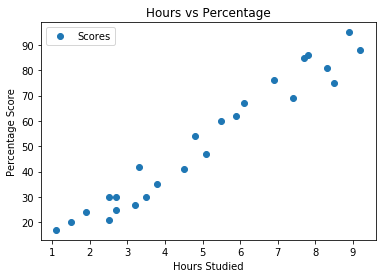

In [3]:
d.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

#### Checking For Outliers

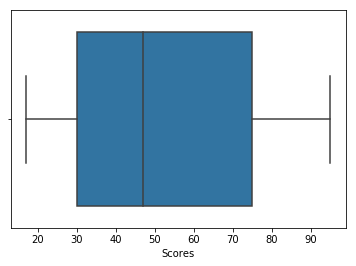

In [4]:
sns.boxplot(d.Scores)

From the Boxplot above, we can clearly see that there are no outliers for our Independent Variable i.e. Scores

#### Checking for null values

In [5]:
d.isnull().sum()

Hours     0
Scores    0
dtype: int64

We can see that there are no null values in the dataset

#### Checking for Duplicates and Dropping them

In [11]:
d.drop_duplicates(inplace=True)
d.shape

(25, 2)

We can see that the dimensions of data has not changed and hence no duplicates were present in he data

#### Checking For Skewness

In [5]:
d.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

From Above Values We can see that the values for Skewness is around 0. Hence, We can say that No Skewness Exists.

# Preparing the data

In [19]:
X =  d.iloc[:, :-1].values 
y =  d.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [20]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45) 

# Training the Algorithm

In [21]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(X_train, y_train) 

LinearRegression()

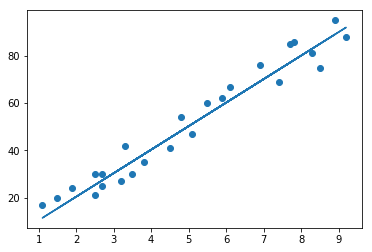

In [22]:
# Plotting Regression Line
line=X*lm.coef_+lm.intercept_

plt.scatter(X, y)
plt.plot(X, line)

# Making Predictions

In [23]:
y_pred=lm.predict(X_test)

In [24]:
# Comparing Results

df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,30,25.361840
1,30,27.350522
2,42,33.316570
3,85,77.067586
4,24,19.395792


In [27]:
# Predict for Own Data

hours=9.25
own_pred=lm.predict([[hours]])

In [28]:
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = 9.25
Predicted Score = 92.47987540719345


Hence Predicted Score for 9.25 Hours of Study is 92.48

# Evaluating the model

In [29]:
from sklearn.metrics import mean_absolute_error  
print('Mean Absolute Error:', 
      mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.701538099875744


In [30]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:', 
      mean_squared_error(y_test, y_pred)) 

Mean Squared Error: 37.61123005187202
